# Aula 01:

Neste módulo foi abordado o conceito de aprendizado de máquina supervisionado e não supervisionado. Foi levado em consideração os labels (ou rótulos) e discutida a diferença entre classificação e clusterização.

O risco é uma variável alvo do problema em um caso de questão de dados. 

Clusterização é um algoritmo não supervisionado.

# Aula 02:

Obtendo os clusters. 

Endereço do dataset: https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv

In [ ]:
import pandas as pd
import scipy as scp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'
df = pd.read_csv(url)

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
#Retirando colunas não desejadas
df.drop(columns=['CUST_ID','TENURE'],inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
#Retirando dados faltantes
missing = df.isna().sum()
print(missing)
#Faltam 313 dados no Minimum_Payments

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [ ]:
df.fillna(df.median(),inplace=True)

In [ ]:
missing = df.isna().sum()
print(missing)
#Todos os dados foram preenchidos com a mediana

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
values = Normalizer().fit_transform(df.values)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5,n_init=10,max_iter=300)
y_pred = kmeans.fit_predict(values)

# Aula 03:

Validando e acompanhando o desempenho dos clusters.

## Métricas de Validação:

- Externas: precisamos ter os labels
- Internas: independentes dos labels

## Critérios de Validação:

1. Compactação: Quão próximos estãos os pontos em um mesmo cluster.
2. Separação: Quão bem separados estão os pontos em clusters diferentes.

## Medida bastante utilizada: Método de Silhoutte


In [ ]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36457606314711744


Não consegui rodar o método silhoutte_score no meu PC. Rodei o notebook no colab para ganhar velocidade nos estudos. O resultado deste método foi 0.364439277430815.

# Aula 04:

Compreendendo os parâmetros de Davies Bouldin. O índice foca no centróide ao invés dos pontos. É muito com o método de Silhoutte.
$$
R _{ij} = \frac{(S_i+S_j)}{D_{ij}}
$$

$$

DBI = \frac{1}{N} * \sum{}_{i=1}^{N} (max_{i!=j}   R _{ij})

$$

In [ ]:
dbs = metrics.davies_bouldin_score(values,labels)
print(dbs)

1.0749530537541763


# Aula 05: 

Índice de Calinski-Harabasz leva a dispersão dos pontos dentro dos clusters. Assim como o Davies Bouldin, ele compara a semelhança e a separação.

https://www.geeksforgeeks.org/calinski-harabasz-index-cluster-validity-indices-set-3/

In [ ]:
ch = metrics.calinski_harabasz_score(values,labels)
print(ch)

3431.58002074861


# Aula 06:

In [ ]:
def clustering_algorithm(n_clusters,dataset):
    kmeans = KMeans(n_clusters=n_clusters,n_init=10,max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset,labels,metric='manhattan')
    # No curso se utiliza a metrica euclidean. Decidi pela manhattan para o código rodar mais rápido
    d = metrics.davies_bouldin_score(dataset,labels)
    c = metrics.calinski_harabasz_score(dataset,labels)
    # print("Silhoutte:",s,"Davies-Boldin",d,"Calinski-Harabasz",c)
    return s,d,c

In [ ]:
clustering_algorithm(3,values)

(0.3287444078014163, 1.3093507662143316, 3526.4668344515403)

In [ ]:
clustering_algorithm(5,values)

(0.3645333662323694, 1.0756224069224563, 3431.798945679164)

In [ ]:
clustering_algorithm(10,values)

(0.29606011798147674, 1.154911857762088, 3017.5053287394276)

In [ ]:
random_data = np.random.rand(8950,16)
clustering_algorithm(5,random_data)

(0.04699727637831865, 3.5330286685671424, 300.74798770231456)

# Aula 07:

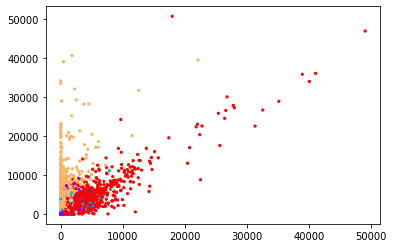

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['PURCHASES'],df['PAYMENTS'],c=labels,s=5,cmap='rainbow')

In [ ]:
df['cluster'] = labels

# Aula 08:

In [ ]:
df.groupby("cluster").describe()

BALANCE                            ... PRC_FULL_PAYMENT               
          count         mean          std  ...              50%       75%  max
cluster                                    ...                                
0        3284.0   445.102105   847.653849  ...         0.000000  0.444444  1.0
1        2642.0  3044.938037  2482.240438  ...         0.000000  0.000000  0.6
2         399.0  1963.743393  1836.283217  ...         0.000000  0.000000  1.0
3        1081.0  1800.909055  1979.686042  ...         0.083333  0.142857  1.0
4        1544.0  1143.323704  1662.446912  ...         0.083333  0.545455  1.0

[5 rows x 128 columns]

In [ ]:
centroides = kmeans.cluster_centers_
centroides

array([[6.92595308e-02, 2.30686023e-04, 1.21382295e-01, 4.79315402e-02,
        7.35508613e-02, 2.47153466e-02, 1.72659283e-04, 3.36343950e-05,
        1.40157387e-04, 7.96901589e-06, 1.25450247e-04, 2.86056694e-03,
        9.43498125e-01, 1.53749473e-01, 5.68773030e-02, 7.60565847e-05],
       [5.06008804e-01, 2.73199069e-04, 6.26436989e-02, 3.68644377e-02,
        2.58010236e-02, 2.49962891e-01, 6.84607127e-05, 2.62761411e-05,
        4.56720931e-05, 5.70264270e-05, 1.14528182e-03, 1.35307476e-03,
        7.18700948e-01, 1.66343271e-01, 1.80691979e-01, 5.33603955e-07],
       [3.24769127e-01, 2.64261579e-04, 1.56170300e-01, 3.18471811e-02,
        1.24720355e-01, 5.86525519e-02, 1.64152214e-04, 2.30217302e-05,
        1.47862104e-04, 1.95436118e-05, 4.28386224e-04, 3.82953041e-03,
        3.69551388e-01, 2.52333724e-01, 6.88501438e-01, 4.42920215e-06],
       [2.36713453e-01, 2.16961764e-04, 5.90293196e-02, 3.35589818e-02,
        2.54755090e-02, 4.04460081e-01, 5.16953900e-05, 2.019

In [ ]:
max = len(centroides[0])
for i in range(max):
  print(df.columns.values[i],"\n{:.4f}".format(centroides[:,i].var()))

BALANCE 
0.0223
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0228
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0366
PAYMENTS 
0.0273
MINIMUM_PAYMENTS 
0.0558
PRC_FULL_PAYMENT 
0.0000


In [ ]:
escolhidos = ['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
df.groupby("cluster")[escolhidos].describe()

BALANCE               ...     PAYMENTS              
          count         mean  ...          75%           max
cluster                       ...                           
0        3284.0   445.102105  ...  1045.484917   8946.495566
1        2642.0  3044.938037  ...  1288.582010  11123.409180
2         399.0  1963.743393  ...  1641.156891   8735.607835
3        1081.0  1800.909055  ...  5949.072074  40627.595240
4        1544.0  1143.323704  ...  3725.052084  50721.483360

[5 rows x 40 columns]

In [ ]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,445.102105,628.639333,143.824757,5131.606811,813.968250,3284
1,3044.938037,389.000167,1621.851847,4489.610144,968.134662,2642
2,1963.743393,850.298471,417.369198,2210.275689,1339.214906,399
3,1800.909055,466.019473,3287.022132,3987.068651,4667.483007,1081
4,1143.323704,3266.487766,183.835583,4092.072637,3044.597207,1544


#Aula 09:

In [ ]:
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,445.102105,628.639333,143.824757,5131.606811,813.968250,3284
1,3044.938037,389.000167,1621.851847,4489.610144,968.134662,2642
2,1963.743393,850.298471,417.369198,2210.275689,1339.214906,399
3,1800.909055,466.019473,3287.022132,3987.068651,4667.483007,1081
4,1143.323704,3266.487766,183.835583,4092.072637,3044.597207,1544


In [ ]:
df.groupby("cluster")['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3284.0,0.246505,0.346644,0.0,0.0,0.000000,0.444444,1.0
1,2642.0,0.001772,0.023236,0.0,0.0,0.000000,0.000000,0.6
2,399.0,0.020108,0.092247,0.0,0.0,0.000000,0.000000,1.0
3,1081.0,0.115960,0.186377,0.0,0.0,0.083333,0.142857,1.0
4,1544.0,0.277309,0.366536,0.0,0.0,0.083333,0.545455,1.0


## ANÁLISES

**CLUSTER 0:** MENOR VALOR DE GASTOS. MENOR VALOR EM SAQUES. MAIOR LIMITE DE CRÉDITOS. MENOR VALOR DE PAGAMENTOS.

**CLUSTER 1:** MAIOR VALOR DE GASTOS. MENOR VALOR EM COMPRAS. VALOR CONSIDERÁVEL EM SAQUES. 

**CLUSTER 2:** MENOR LIMITE DE CRÉDITO.

**CLUSTER 3:** MAIOR VALOR EM SAQUES COM GRANDES DIFERENÇAS. MAIOR VALOR DE PAGAMENTO.

**CLUSTER 4:** MAIOR VALOR EM COMPRAS COM GRANDE DIFERENÇAS. PAGAMENTOS CONSIDERÁVEIS


### ANÁLISE FINAL

**CLUSTER 0:** CLIENTES QUE GASTAM POUCO. PAGADORES OK. MAIOR NÚMERO DE CLIENTES.

**CLUSTER 1:** CLIENTES QUE MAIS GASTAM. O FOCO É EM SAQUE. NÃO COSTUMAM PAGAR.

**CLUSTER 2:** CLIENTE COM MENOR LIMITE. MENOR NÚMERO DE CLIENTES.

**CLUSTER 3:** CLIENTES QUE GASTAM MUITO COM SAQUES.

**CLUSTER 4:** CLIENTES QUE GASTAM MUITO COM COMPRAS. BONS PAGADORES.

## Como utilizar o Cluster?

Podemos aplicar estratégia de negócios para os grupos de cluster. Aumentar o limite para os clientes que pagam bem, inserir uma estratégia para aumentar o número de compras os que gastam pouco. Bonificar os clientes que gastam muito com compras e são bons pagadores. São diversas estratégias que podem ser aplicadas pelo negócio.

Podemos usar também um teste AB e conferir se os grupos de teste e controle responderam ao estímulo (programa de pontos, por exemplo).